# Transformacion de los datos 
Transformando las fuentes de datos para adecuarlas a los KPI's Elejidos

## Crecimiento del Mercado Movil, Telefonia Fija e Internet

In [29]:
import pandas as pd

#Carga tablas de ingreso
fileInternet = ".//dataClean//ingresos_internet.csv"
fileTelefono = ".//dataClean//ingresos_telefonia_fija.csv"
fileCelular = ".//dataClean//Ingresos_Telefonia_movil.csv"

dfInternet = pd.read_csv(fileInternet)
dfCelular = pd.read_csv(fileCelular)
dfTelefono = pd.read_csv(fileTelefono)

display(dfInternet.head(2))
display(dfCelular.head(2))
display(dfTelefono.head(2))

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022
1,2022,3,64,Jul-Sept 2022


,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,$ 13.135.235,Ene-Mar 2013
1,2013,2,$ 13.970.806,Abr-Jun 2013


,Año,Trimestre,Ingresos (miles de $)
0,2014,1,291.607.175
1,2014,2,297.486.520


Une los 3 df

In [30]:
# Realiza la unión de los DataFrames según el año y el trimestre
merged_df = pd.merge(dfInternet, dfCelular, on=['Año', 'Trimestre'])
merged_df = pd.merge(merged_df, dfTelefono, on=['Año', 'Trimestre'])

merged_df.head(2)

,Año,Trimestre,Ingresos (miles de pesos),Periodo_x,Ingresos (miles de $)_x,Periodo_y,Ingresos (miles de $)_y
0,2022,4,72,Oct-Dic 2022,$ 204.796.575,Oct-Dic 2022,3.235.691.392
1,2022,3,64,Jul-Sept 2022,$ 180.356.862,Jul-Sept 2022,2.969.851.257


In [31]:
# Elimina la columna "periodo" del DataFrame resultante
merged_df = merged_df.drop('Periodo_x', axis=1)
merged_df = merged_df.drop('Periodo_y', axis=1)
merged_df.head(3)

# Crear una lista con los nuevos nombres de columnas
nuevos_nombres = ['Año','Trimestre','Internet', 'Celular', 'Telefonia']

# Asignar los nuevos nombres de columnas al DataFrame
merged_df.columns = nuevos_nombres

#Quito los puntos y los signos de las columnas de numeros
columnas = ['Internet', 'Celular', 'Telefonia']
for col in columnas:
    #Cambio la columna a string
    merged_df[col] = merged_df[col].astype(str)
    #Elimino todos los puntos
    merged_df[col] = merged_df[col].str.replace('.', '')
    merged_df[col] = merged_df[col].str.replace('$', '')
    merged_df[col] = merged_df[col].str.replace(',', '.')

merged_df.head(2)

,Año,Trimestre,Internet,Celular,Telefonia
0,2022,4,72,204796575,3235691392
1,2022,3,64,180356862,2969851257


In [32]:
#Multiplica por 1 millon
merged_df['Internet'] = merged_df['Internet'].astype(float) * 1000000
merged_df.head(2)

,Año,Trimestre,Internet,Celular,Telefonia
0,2022,4,72000000.0,204796575,3235691392
1,2022,3,64000000.0,180356862,2969851257


In [35]:
#Guardando el DF
nombre_archivo = './/Data(ST)//01-Ingresos.csv'
merged_df.to_csv(nombre_archivo, index=False)

In [34]:
año_busqueda = 2022
trimestre_busqueda = 1

dflist = [dfInternet, dfCelular, dfTelefono]

for df in dflist:
    rdf = df.loc[(df['Año'] == año_busqueda) & (df['Trimestre'] == trimestre_busqueda)]
    display(rdf.head())

,Año,Trimestre,Ingresos (miles de pesos),Periodo
3,2022,1,55,Ene-Mar 2022


,Año,Trimestre,Ingresos (miles de $),Periodo
36,2022,1,$ 130.454.676,Ene-Mar 2022


,Año,Trimestre,Ingresos (miles de $)
32,2022,1,30.583.344


## Penetración y Acceso a Internet

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV y renombrar columnas
df = pd.read_csv(".//dataClean//02-Internet_Penetracion.csv")
df.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


In [38]:
#Quito los puntos y los signos de las columnas de numeros
columnas = ['Accesos por cada 100 hogares','Accesos por cada 100 hab']
for col in columnas:
    # Eliminar los puntos y los signos de las columnas de números
    df[col] = df[col].replace('\.', '', regex=True)
    df[col] = df[col].replace('\$', '', regex=True)
    df[col] = df[col].replace(',', '.', regex=True)
    # Convertir las columnas al tipo de dato float
    df[col] = df[col].astype(float)

df['Periodo'] = df['Año'].astype(str) + "-" + df['Trimestre'].astype(str)
df = df.sort_values('Periodo')
df.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
35,2014,1,49.55,15.05,2014-1
34,2014,2,49.86,15.16,2014-2
33,2014,3,50.67,15.43,2014-3
32,2014,4,50.50,15.39,2014-4
31,2015,1,51.36,15.68,2015-1


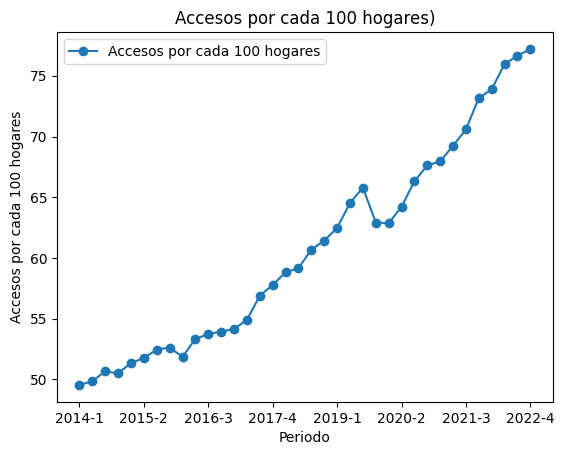

In [40]:
# Crear la figura y los ejes del gráfico
fig, ax = plt.subplots()

# Graficar la línea
df.plot(x='Periodo', y='Accesos por cada 100 hogares', ax=ax, marker='o')

# Configurar los títulos y etiquetas de los ejes
plt.title("Accesos por cada 100 hogares)")
plt.xlabel("Periodo")
plt.ylabel("Accesos por cada 100 hogares")

# Mostrar el gráfico
plt.show()

Como es posible observar, el número de hogares con acceso a Internet fijo muestra una tendencia creciente desde el año 2014 en Argentina. Mientras que para el año 2014, 50 de cada 100 hogares contaba con acceso a Internet fijo, para el año 2020 el acceso asciende a 63 hogares en promedio. Se observa tambien marcadamente el efecto Pandemia con una contraccion clara del acceso. De esta manera, para el primer trimestre del 2020 63 de cada 100 hogares argentinos posee Internet fijo en sus hogares. En particular, se detecta un marcado incremento a partir del año 2017.

In [39]:
#Guardando el DF
nombre_archivo = './/Data(ST)//Penetración de Internet fijo por cada 100 hogares.csv'
df.to_csv(nombre_archivo, index=False)

## Crecimento de Internet y Poblacion

In [48]:
#Carga la tabla 04-Internet_BAF_xProvincia.csv a un df
fileName = ".//Data//04-Internet_BAF.csv"
df = pd.read_csv(fileName)
df.head(2)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2


###### **Nota**
 BAF es un acrónimo utilizado en el contexto de las telecomunicaciones que se refiere a la Banda Ancha Fija (también conocida como Broadband Access Fixed en inglés).

In [49]:
#Creo columna de fecha
df['Periodo'] = df['Año'].astype(str) + "-" + df['Trimestre'].astype(str)

#Cambio los numeros a string para quitarles el '.'
df['Banda ancha fija'] = df['Banda ancha fija'].astype(str)
df['Dial up'] = df['Dial up'].astype(str)
df['Total'] = df['Total'].astype(str)

#Quitamos el '.' y lo volvemos entero
df['Banda ancha fija'] = df['Banda ancha fija'].str.replace('.', '')
df['Dial up'] = df['Dial up'].str.replace('.', '')
df['Total'] = df['Total'].str.replace('.', '')

# Crear una lista para almacenar los valores no convertibles a int
valores_ba = []
valores_du = []
valores_to = []

# Iterar sobre los valores de las columnas
for row in df.itertuples(index=False):
    try:
        int(row[3])  # Intentar convertir a entero (Banda ancha fija)
    except ValueError:
        valores_ba.append(row[3])
    try:
        int(row[4])  # Intentar convertir a entero (Dial up)
    except ValueError:
        valores_du.append(row[4])
    try:
        int(row[5])  # Intentar convertir a entero (Total)
    except ValueError:
        valores_to.append(row[5])


# Imprimir la lista de valores no convertibles
print(f"Banda Ancha {valores_ba}")
print(f"Dial up {valores_du}")
print(f"Total {valores_to}")

Banda Ancha []
Dial up ['nan', 'nan']
Total []


In [50]:
#Cambiamos el "- 0" x "0"
df['Dial up'] = df['Dial up'].str.replace('nan', '0')
df['Dial up'] = df['Dial up'].str.replace('- 0', '0')
valores_du = []
# Iterar sobre los valores de las columnas
for val in df['Dial up']:
    try:
        int(val)  # Intentar convertir a entero (Dial up)
    except ValueError:
        valores_du.append(val)
print(f"Dial up {valores_du}")

Dial up []


In [51]:
#Cambiamos a entero
df['Banda ancha fija'] = df['Banda ancha fija'].astype(int)
df['Dial up'] = df['Dial up'].astype(int)
df['Total'] = df['Total'].astype(int)
df.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,Buenos Aires,5,60,5,2022-4
1,2022,4,Capital Federal,2,20,2,2022-4
2,2022,4,Catamarca,71,10,71,2022-4
3,2022,4,Chaco,144,50,144,2022-4
4,2022,4,Chubut,168,9040,169,2022-4


In [52]:
#eliminamos columnas 
columnas = ['Trimestre','Total']
df = df.drop(columnas,axis=1)
df.head()

<bound method NDFrame.head of       Año            Provincia  Banda ancha fija  Dial up Periodo
0    2022         Buenos Aires                 5       60  2022-4
1    2022      Capital Federal                 2       20  2022-4
2    2022            Catamarca                71       10  2022-4
3    2022                Chaco               144       50  2022-4
4    2022               Chubut               168     9040  2022-4
..    ...                  ...               ...      ...     ...
859  2014           Santa Cruz                26     4600  2014-1
860  2014             Santa Fe               506     6120  2014-1
861  2014  Santiago Del Estero                37       90  2014-1
862  2014     Tierra Del Fuego                27     7660  2014-1
863  2014              Tucumán               130      880  2014-1

[864 rows x 5 columns]>

In [54]:
# Guardar el DataFrame en un archivo CSV
nombre_archivo = './/Data(ST)//04-(c)Internet_BAFxProvincia.csv'
df.to_csv(nombre_archivo, index=False)

## Crecimento de Acceso de Internet por cada 100 hogares
Procedimento:

*   Se obtiene la fecha menor y la fecha mayor para el rango
*   Se crea un nuevo DF para obtener el acceso de la fecha menor y la fecha mayor
*   Se hace las operaciones para obtener la diferencia entre las fechas en porcentaje
*   Creamos un nuevo DF
*   Se guarda el nuevo DF en un archivo con formato CSV

In [60]:
#Carga la tabla 01penetracion a un df
fileName = "dataClean//01-Internet_Penetracion.csv"
df = pd.read_csv(fileName)
df_filtrado = df[['Año','Provincia','Accesos por cada 100 hogares']]
df_filtrado.head(2)

,Año,Provincia,Accesos por cada 100 hogares
0,2022,Buenos Aires,"78,94"
1,2022,Capital Federal,"122,73"


In [61]:
columnas = ['Provincia', 'Val_Ini', 'Val_Fin']
df_Final = pd.DataFrame(columns=columnas)

# Recorrer todos los renglones del DataFrame
for indice, fila in df_filtrado.iterrows():
    # Acceder a los valores de cada columna en la fila actual
    anio = fila['Año']
    provincia = fila['Provincia']
    val = fila['Accesos por cada 100 hogares']

    # Verificar si el valor ya existe en la columna existente
    valor_existe = df_Final['Provincia'].isin([provincia]).any()

    if valor_existe:
        if anio == 2014:
            df_Final.loc[df_Final['Provincia'] == provincia, 'Val_Ini'] = val
        elif anio == 2022:
            df_Final.loc[df_Final['Provincia'] == provincia, 'Val_Fin'] = val
    else:
        nuevo_registro = {
            'Provincia': provincia,
            'Val_Ini': None,
            'Val_Fin': None
        }
        if anio == 2014:
            nuevo_registro['Val_Ini'] = val
        elif anio == 2022:
            nuevo_registro['Val_Fin'] = val

        df_Final = pd.concat([df_Final, pd.DataFrame(nuevo_registro, index=[0])], ignore_index=True)

# Reemplazar la coma por un punto y convertir los valores a números
df_Final['Val_Ini'] = df_Final['Val_Ini'].str.replace(',', '.').astype(float)
df_Final['Val_Fin'] = df_Final['Val_Fin'].str.replace(',', '.').astype(float)

# Imprimir el DataFrame final
display(df_Final.head(2))

,Provincia,Val_Ini,Val_Fin
0,Buenos Aires,54.57,76.08
1,Capital Federal,112.25,111.80


In [62]:
# Calcular la diferencia porcentual entre 'Val_Ini' y 'Val_Fin'
df_Final['Dif %'] = ((df_Final['Val_Fin'] *100 / df_Final['Val_Ini'])-100).round(2)

# Mostrar el DataFrame
display(df_Final.head())

,Provincia,Val_Ini,Val_Fin,Dif %
0,Buenos Aires,54.57,76.08,39.42
1,Capital Federal,112.25,111.80,-0.40
2,Catamarca,24.25,58.21,140.04
3,Chaco,20.72,44.06,112.64
4,Chubut,41.24,88.05,113.51


In [63]:
# Guardar el DataFrame en un archivo CSV
nombre_archivo = './/Data(ST)//01-CrecimientoxProvincia.csv'
df_Final.to_csv(nombre_archivo, index=False)

## Internet - Acceso por Tecnologia y Provincias

In [66]:
#Carga la tabla 04-Internet_BAF_xProvincia.csv a un df
fileName = ".//dataClean//06-Internet_Accesos-por-tecnologia.csv"
df = pd.read_csv(fileName)
df.head(2)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0


In [67]:
columnas = ['ADSL','Cablemodem','Fibra óptica','Wireless','Otros','Total']
for col in columnas:
    #Cambio la columna a string
    df[col] = df[col].astype(str)
    #Elimino todos los puntos
    df[col] = df[col].str.replace('.', '')


# Iterar sobre los valores de las columnas
for row in df.itertuples(index=False):
    try:
        int(row[3])  # Intentar convertir a entero (Banda ancha fija)
    except ValueError:
        valores_ba.append(row[3])
    try:
        int(row[4])  # Intentar convertir a entero (Dial up)
    except ValueError:
        valores_du.append(row[4])
    try:
        int(row[5])  # Intentar convertir a entero (Total)
    except ValueError:
        valores_to.append(row[5])


# Imprimir la lista de valores no convertibles
print(f"Banda Ancha {valores_ba}")
print(f"Dial up {valores_du}")
print(f"Total {valores_to}")    
df.head(3)

Banda Ancha ['nan']
Dial up ['nan']
Total ['nan']


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,3260,30,10,1300,720,50
1,2022,4,Capital Federal,1390,10,1390,50,320,20
2,2022,4,Catamarca,90,110,470,10,20,710


In [68]:
# Guardar el DataFrame en un archivo CSV
nombre_archivo = './/Data(ST)//06-Internet_Accesos-por-tecnologiaxprovincia.csv'
df.to_csv(nombre_archivo, index=False)

## Crecimiento Internet vs Población

In [72]:
#Carga los archivos
poblacion = ".//dataClean//OF-01-Poblacion(Censo 2022).csv"
crecimiento =  ".//Data(ST)//01-CrecimientoxProvincia.csv"

#Cargo el DF
dfpoblacion = pd.read_csv(poblacion)
dfcrecimiento = pd.read_csv(crecimiento)

display(dfpoblacion.head(3))
display(dfcrecimiento.head(3))

,Jurisdicción,Total de viviendas particulares,Total de viviendas colectivas,Total de población,Población en viviendas particulares,Población en viviendas colectivas (1),Población en situación de calle (vía pública)
0,Ciudad Autónoma de Buenos Aires,1638764,1946,3120612,3092942,26767,903
1,Buenos Aires,6695273,6535,17569053,17450899,117193,961
2,Catamarca,158989,449,429556,427415,2139,2


,Provincia,Val_Ini,Val_Fin,Dif %
0,Buenos Aires,54.57,76.08,39.42
1,Capital Federal,112.25,111.80,-0.40
2,Catamarca,24.25,58.21,140.04


In [74]:
columnas = dfpoblacion.columns # Listo las columnas

# Columnas de poblacion
aBorrar = ['Total de viviendas particulares',
       'Total de viviendas colectivas',
       'Población en viviendas particulares',
       'Población en viviendas colectivas (1)',
       'Población en situación de calle (vía pública)']

total = dfpoblacion['Total de población'].sum() 
dfpoblacion = dfpoblacion.drop(aBorrar,axis=1)
dfpoblacion.rename(columns={'Jurisdicción': 'Provincia'}, inplace=True)
dfpoblacion.rename(columns={'Total de población': 'Poblacion'}, inplace=True)
dfcrecimiento.rename(columns={'Dif %': 'Internet %'}, inplace=True)

print(f'El total de la poblacion es {total}')

df_unido = dfpoblacion.merge(dfcrecimiento, on=["Provincia", "Provincia"])
# Borra una columnas 
columnas=['Val_Ini','Val_Fin']
df_unido = df_unido.drop(columnas,axis=1)

df_unido.head(2)

El total de la poblacion es 46044703


,Provincia,Poblacion,Internet %
0,Buenos Aires,17569053,39.42
1,Catamarca,429556,140.04


In [76]:
df_unido['Poblacion %'] = df_unido['Poblacion']/total*100
df_unido.head()

,Provincia,Poblacion,Internet %,Poblacion %
0,Buenos Aires,17569053,39.42,38.156513
1,Catamarca,429556,140.04,0.932911
2,Chaco,1142963,112.64,2.482290
3,Chubut,603120,113.51,1.309858
4,Córdoba,3978984,63.29,8.641567


In [77]:
# Calcula el valor mínimo y máximo de las columnas de interés
min_crecimiento_poblacion = df_unido['Poblacion %'].min()
max_crecimiento_poblacion = df_unido['Poblacion %'].max()

min_crecimiento_internet = df_unido['Internet %'].min()
max_crecimiento_internet = df_unido['Internet %'].max()

# Normaliza los datos de las columnas y agrega las nuevas columnas normalizadas
df_unido['% Poblacion Norm'] = (df_unido['Poblacion %'] - min_crecimiento_poblacion) / (max_crecimiento_poblacion - min_crecimiento_poblacion)
df_unido['% Internet Norm'] = (df_unido['Internet %'] - min_crecimiento_internet) / (max_crecimiento_internet - min_crecimiento_internet)

df_unido.head(3)

,Provincia,Poblacion,Internet %,Poblacion %,% Poblacion Norm,% Internet Norm
0,Buenos Aires,17569053,39.42,38.156513,1.000000,0.000000
1,Catamarca,429556,140.04,0.932911,0.005575,0.138997
2,Chaco,1142963,112.64,2.482290,0.046966,0.101147


In [78]:
df_unido.head(2)
# Guardar el DataFrame en un archivo CSV
nombre_archivo = './/Data(ST)//OF-02-Crecimiento_Poblacion.csv'
df_unido.to_csv(nombre_archivo, index=False)

## Conectividad 
Conectividad_al_servicio_internet.csv



In [80]:
#Carga los archivos
datos = ".//dataClean//16-Listadodelocalidadesconconectividadainternet.csv"
#Cargo el DF
df = pd.read_csv(datos)
display(df.head(3))


,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--


### Los archivos listados debajo fueron procesados dentro de power bi, ya que su transformación era mucho más sencilla y fue con la finalidad de ahorrar tiempo 

## Internet  x cada 100 hogares
Internet fijo_2022(Acceso_cada_100 hogares)

## Participacion del internet fijo
Participacion_internet_fija(CABASE).csv

## Participacion Internet Movil
Participacion_Internet_Movil(CABASE).csv

## Acceso a Internet Fijo x Tecnología
Serie_trimestral_acceso_internet_fijo_por_tecnologia.csv

## Velocidad de Bajada por Provinncias
Velocidad_media_bajada_Internet_fijo_por_provincia.csv

## Velocidad Media de Bajada del Internet Fijo
Velocidad_Media_de_bajada_internet_fijo.csv